In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Text(0, 0.5, 'y')

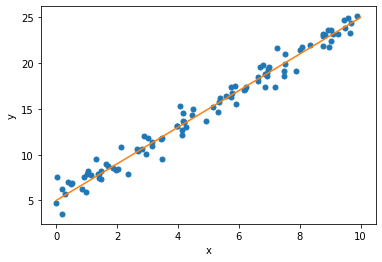

In [2]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(x, y, 'o', ms = 5)

xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx )
plt.xlabel('x')
plt.ylabel('y')

In [3]:

# def compute_rss(y_estimate, y):
#   return sum(np.power(y-y_estimate, 2))

# def estimate_y(x, b_0, b_1):
#   return b_0 + b_1 * x

# rss = compute_rss(estimate_y(x, beta_0, beta_1), y) 
# rss

We have seen in the above graph dummy data with intercept in 5 and slope 2. Which resembles to a linear equation of a line: 
$$y = b_0 + m\cdot x,$$
and with the given values it would look like the following: 
$$y = 5 + 2\cdot x$$

#### The RSS (Residual Sum of Squares)
Let's first create a set of different slopes which can be inserted in the above equation instead of `2`. What is the plan? 

With each slope we will have an array of `100` results that will be differentiated with `y` and then those differences will be squared. After that, we will sum those squared values which gives a number next appended in the `rss` list.

In short, with each slope we will have a corresponding _sum value_ in our `rss` list. The next step is just to find the lowest value in the given list. Which will be accomplished with `np.argmin(rss)`. Since the index in the `rss` list is the same as the `slopes` list, we can find the slope corresponding to the lowest rss value.

In [4]:
rss = []

slopes = np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 -slope*x)**2))

ind_min = np.argmin(rss)

print(slopes[ind_min])

2.003999999993347


Text(0, 0.5, '$RSS$')

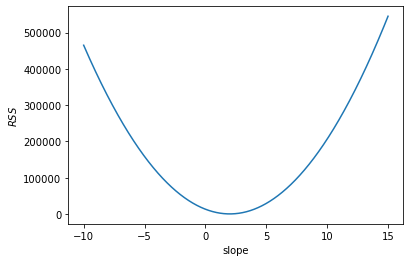

In [5]:
plt.figure()
plt.plot(slopes,rss)
plt.xlabel('slope')
plt.ylabel('$RSS$')

## Simple linear Regression in code

In [ ]:
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

In [7]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           7.47e-82
Time:                        06:09:27   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## ScikitLearn for Linear regression

In [9]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10*ss.uniform.rvs(size=n)
x_2 = 10*ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2*x_2 + ss.norm.rvs(loc=0,scale=1,size=n)

X = np.stack([x_1, x_2], axis=1)

Text(0.5, 0, '$y$')

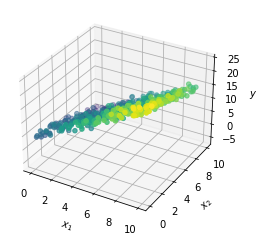

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,c=y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

In [14]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)
lm.intercept_
lm.coef_[0]
lm.coef_[1]

-1.020264486993336

Qué pasaría cuando le damos dos valores a x1 y x2?

In [17]:
X_0 = np.array([2,4])
lm.predict(X_0.reshape(1,-1))
lm.score(X,y)

0.9798997316600129

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.9794930834681773